# Augmentation

In [37]:
# imports
import os
import numpy as np

import h5py 

from matplotlib import pyplot as plt

import skimage.transform

from ulmo import io as ulmo_io
from ulmo.ssl import single_image as ssl_simage
from ulmo.ssl import train_util

# defs

In [35]:
def show_img(img, cbar=False):
    plt.clf()
    if len(img.shape) == 2:
        i = plt.imshow(img, cmap='jet')
    elif len(img.shape) == 3:
        i = plt.imshow(img[0,...], cmap='jet')
    else:
        i = plt.imshow(img[0,0,...], cmap='jet')
    if cbar:
        plt.colorbar()
    plt.show()

# Load up

In [10]:
modis_dataset_path = os.path.join(os.getenv('SST_OOD'),
    "MODIS_L2/PreProc/MODIS_R2019_2003_95clear_128x128_preproc_std.h5")
with ulmo_io.open(modis_dataset_path, 'rb') as f:
    hf = h5py.File(f, 'r')
    img = hf['valid'][400]

# Show

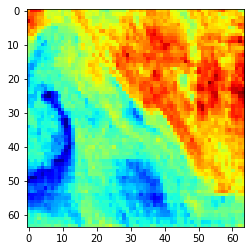

In [25]:
show_img(img)

# Augment

In [15]:
loader = ssl_simage.image_loader(img)
test_batch = iter(loader).next()
img1, img2 = test_batch

## Show

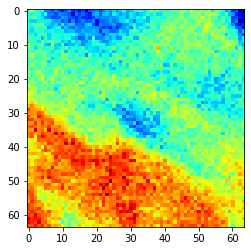

In [19]:
plt.clf()
plt.imshow(img1[0,0,...], cmap='jet')
plt.show()

# Step by step

## Rotate  (RandomRotate)

In [33]:
rang = np.float32(360*np.random.rand(1))
print('random angle = {}'.format(rang))
iaug = (skimage.transform.rotate(img[0,...].astype(np.float32), rang[0])).astype(np.float32)

random angle = [140.16031]


In [34]:
iaug.shape

(64, 64)

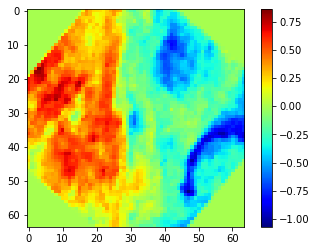

In [36]:
show_img(iaug, cbar=True)

## JitterCrop

In [38]:
jcrop = train_util.JitterCrop()

In [40]:
iaug2 = jcrop(np.reshape(iaug, [64,64,1]))

In [41]:
iaug2.shape

(64, 64, 3)

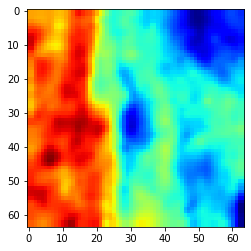

In [42]:
show_img(iaug2[:,:,0])